In [1]:
import TimeTagger as tt
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from time import gmtime, strftime

In [2]:
binwidth=100 #in us
total_time = 2e6 #in us

ctr = tt.Counter(
                time_tagger._tagger,
                channels=[time_tagger._pixelclock_click_chn],
                binwidth=binwidth*1e6,
                n_values=int(total_time/binwidth))

In [3]:
data = ctr.getData()

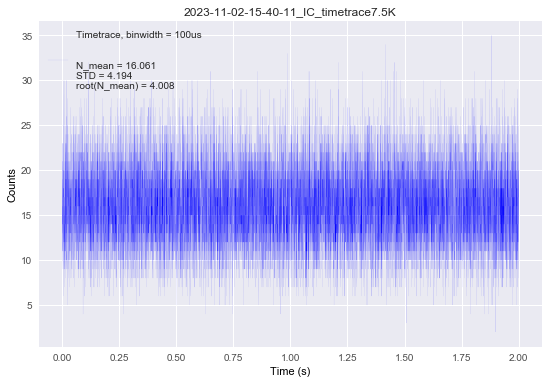

In [4]:
filename = "G:\\Data\\Qudi_Data\\2023\\11\\20231103\\"

label1 = f"""\n\n
N_mean = {round(np.mean(data[0]),3)}
STD = {round(np.std(data[0]),3)}
root(N_mean) = {round(np.sqrt(np.mean(data[0])),3)}"""

x_axis = np.linspace(0, total_time, int(total_time/binwidth))*1e-6
plt.plot(x_axis, data[0],'b-', linewidth=0.05,label=f'Timetrace, binwidth = {binwidth}us'+label1)


plt.xlabel(f'Time (s)')
plt.ylabel(f'Counts')
plt.legend()

time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())

name = time+"_IC_timetrace10.0K"
plt.title(name)
with open(filename+name+".png", 'wb') as f:
    plt.savefig(f,format='png',dpi=400)
plt.show()

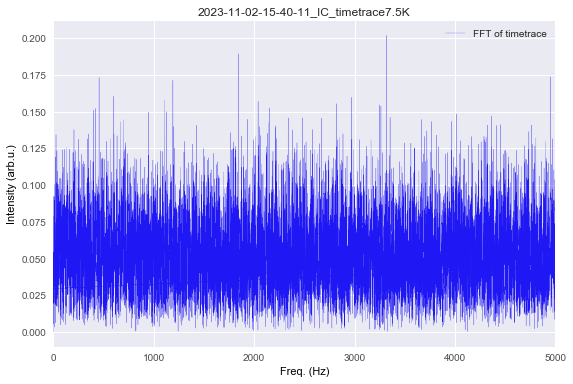

In [5]:
y = data[0].copy()
T = binwidth*1e-6
N = int(total_time/binwidth)

yf = fft(y - y.mean())
xf = fftfreq(N,T)

yplot = 2.0/N* (yf)
plt.figure(figsize=(9,6))
plt.plot(xf, np.abs(yplot),'-',linewidth=0.2,label='FFT of timetrace')
plt.xlim(0,xf.max())


plt.xlabel(f'Freq. (Hz)')
plt.ylabel('Intensity (arb.u.)')
plt.legend()

plt.title(name)
with open(filename+name+"_fft.png", 'wb') as f:
    plt.savefig(f,format='png',dpi=400)
plt.show()

Save data

In [6]:
comments = f'#binwidth = {binwidth}us\n#total time = {total_time}us\n'
header = f'#Data trace (counts)'
np.savetxt(filename+name+".txt",data[0],header=header,comments=comments)

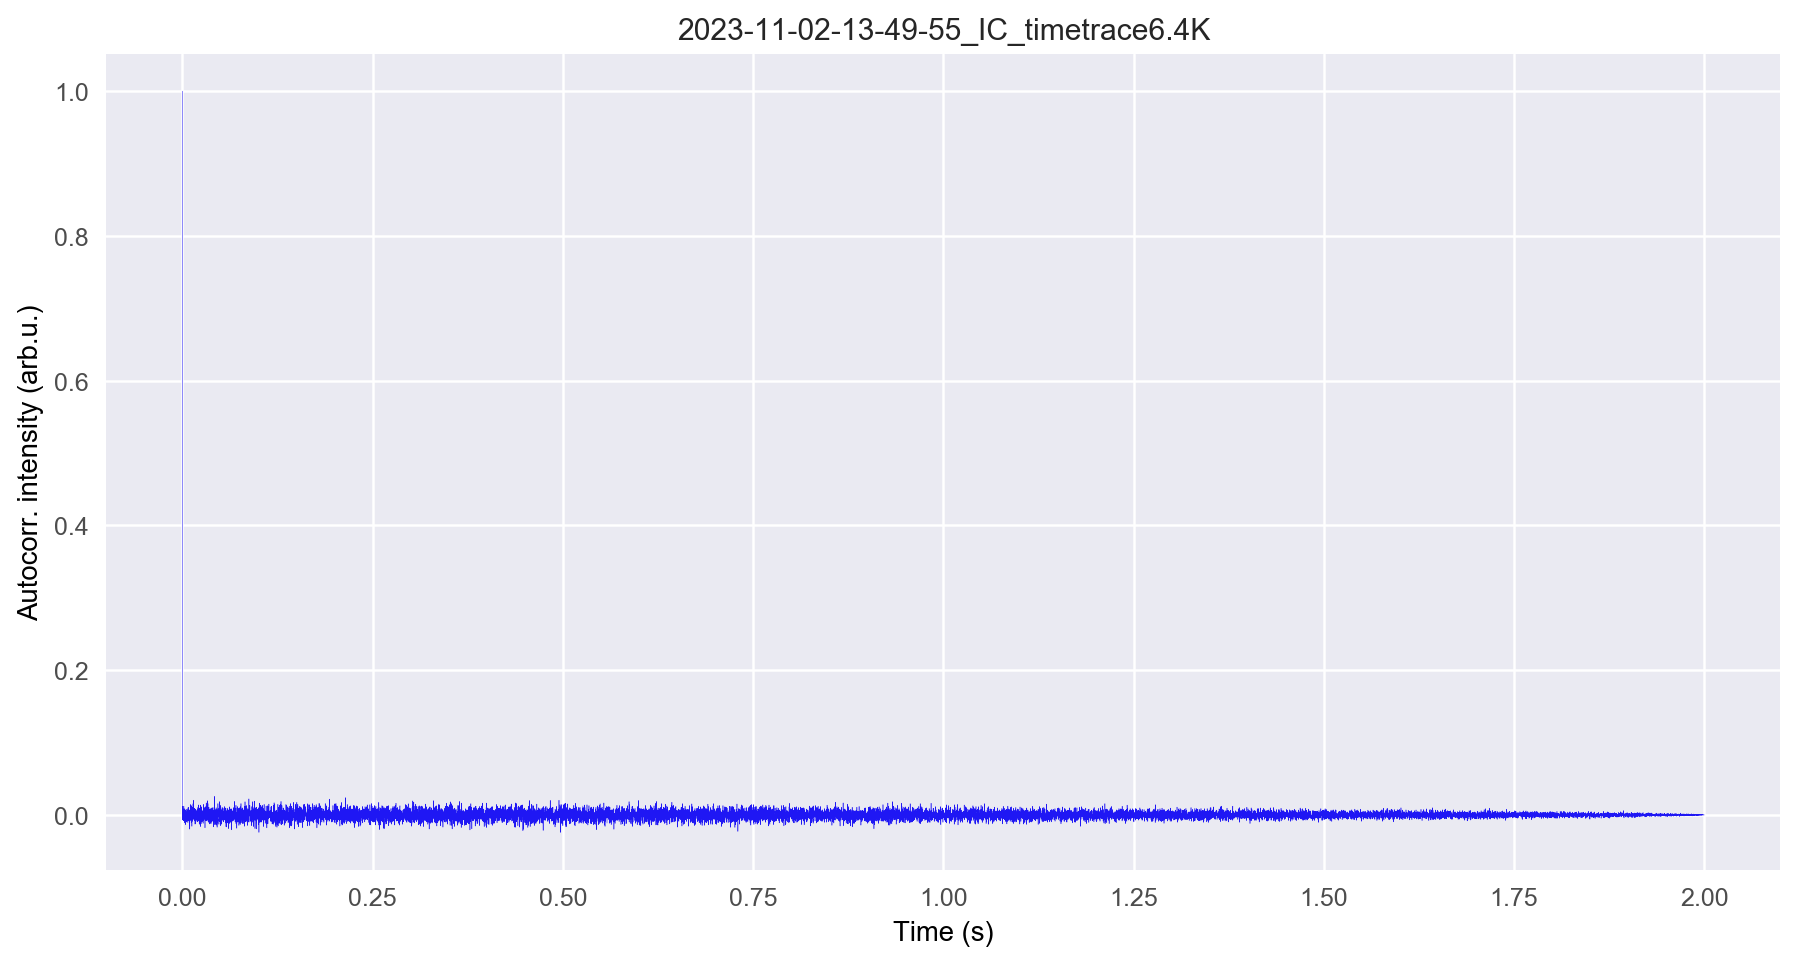

In [32]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    ret = (result[(result.size // 2):])
    return ret/ret.max()

y = data[0].copy()

ycorr = autocorr(y-y.mean())
x_axis = np.linspace(0, total_time, int(total_time/binwidth))*1e-6
plt.plot(x_axis[:], ycorr[:], '-', linewidth=0.2)

plt.xlabel(f'Time (s)')
plt.ylabel('Autocorr. intensity (arb.u.)')
plt.legend()

plt.title(name)
# with open(filename+name+"_autocorr.png", 'wb') as f:
#     plt.savefig(f,format='png',dpi=400)
plt.show()

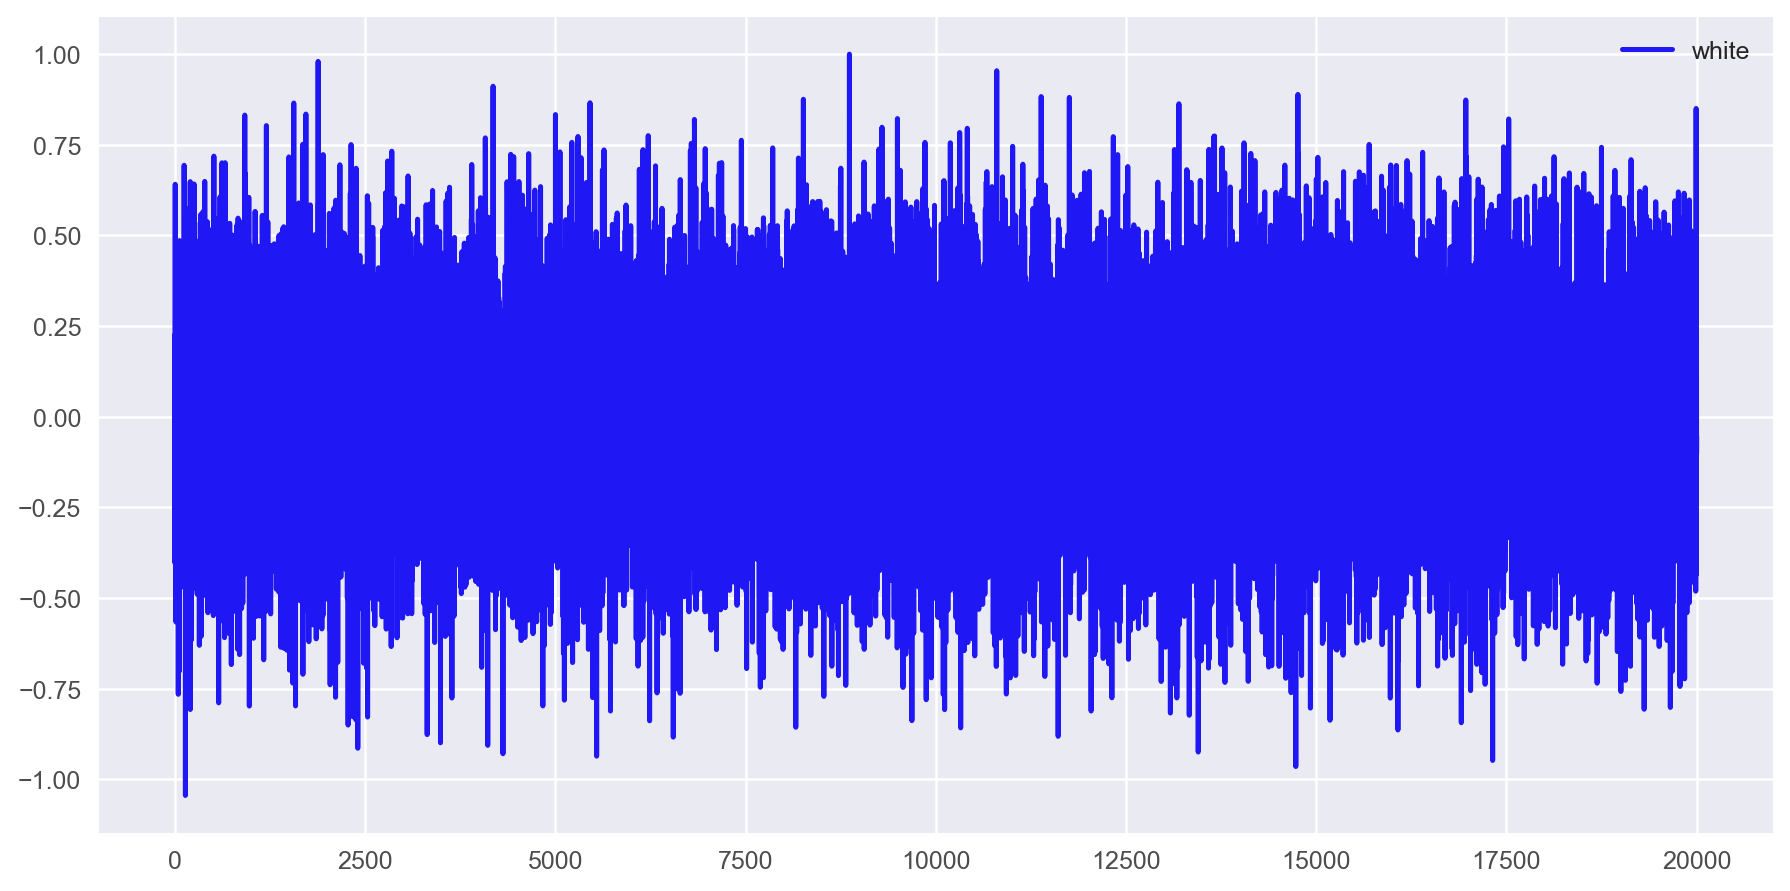

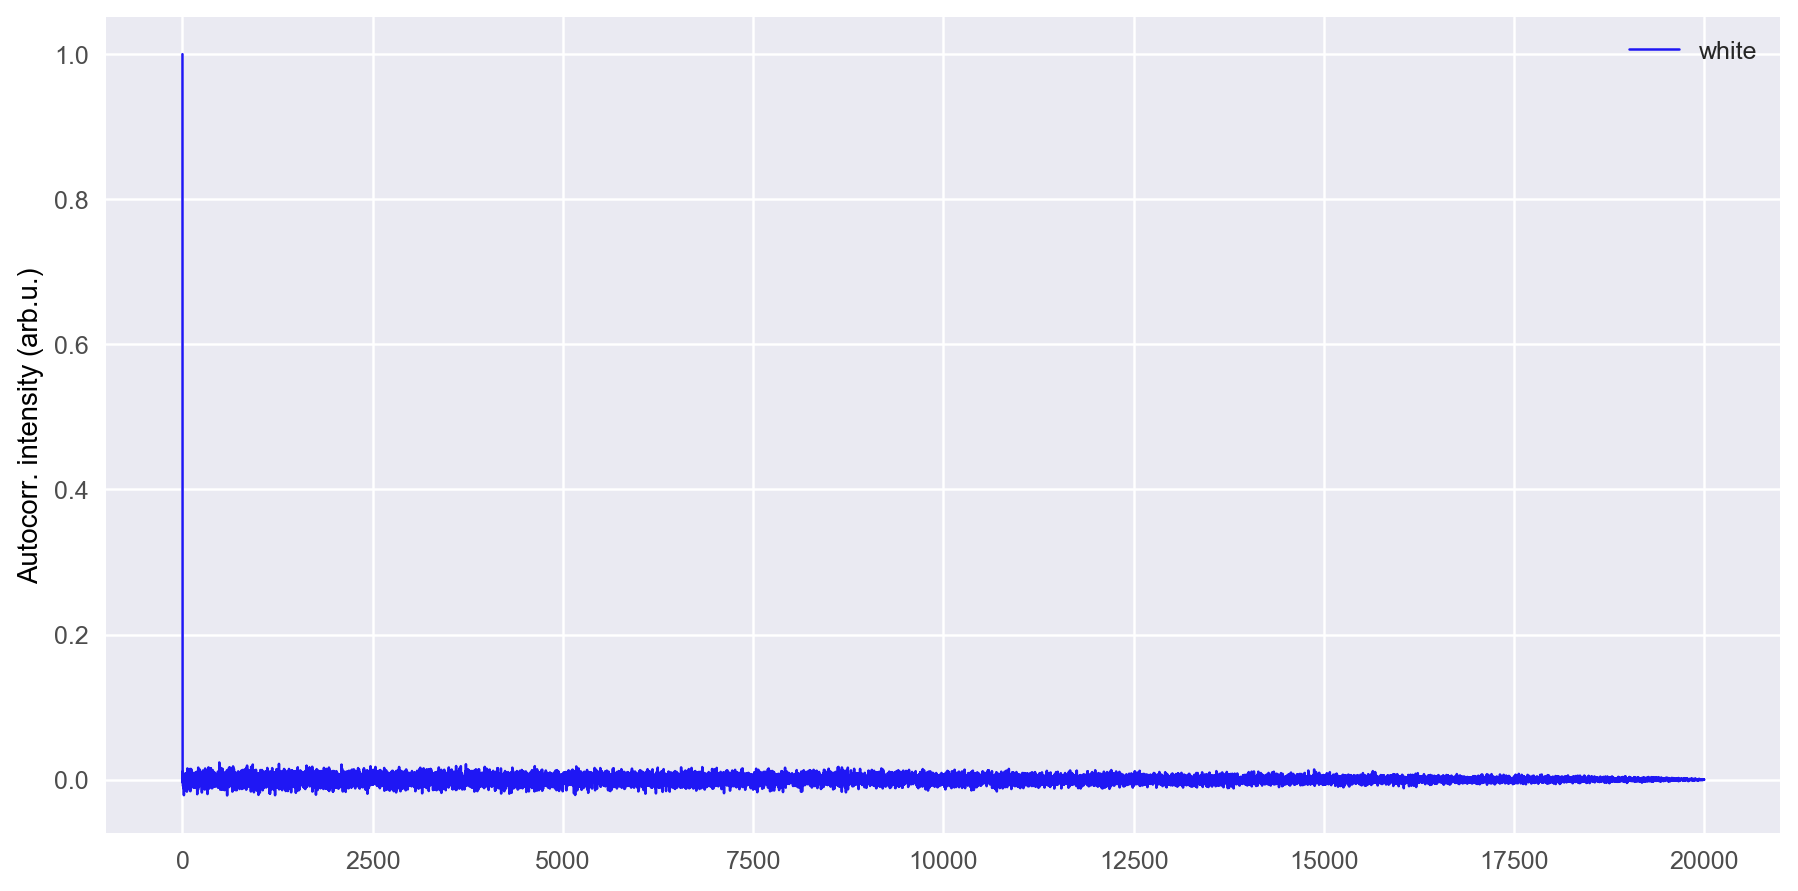

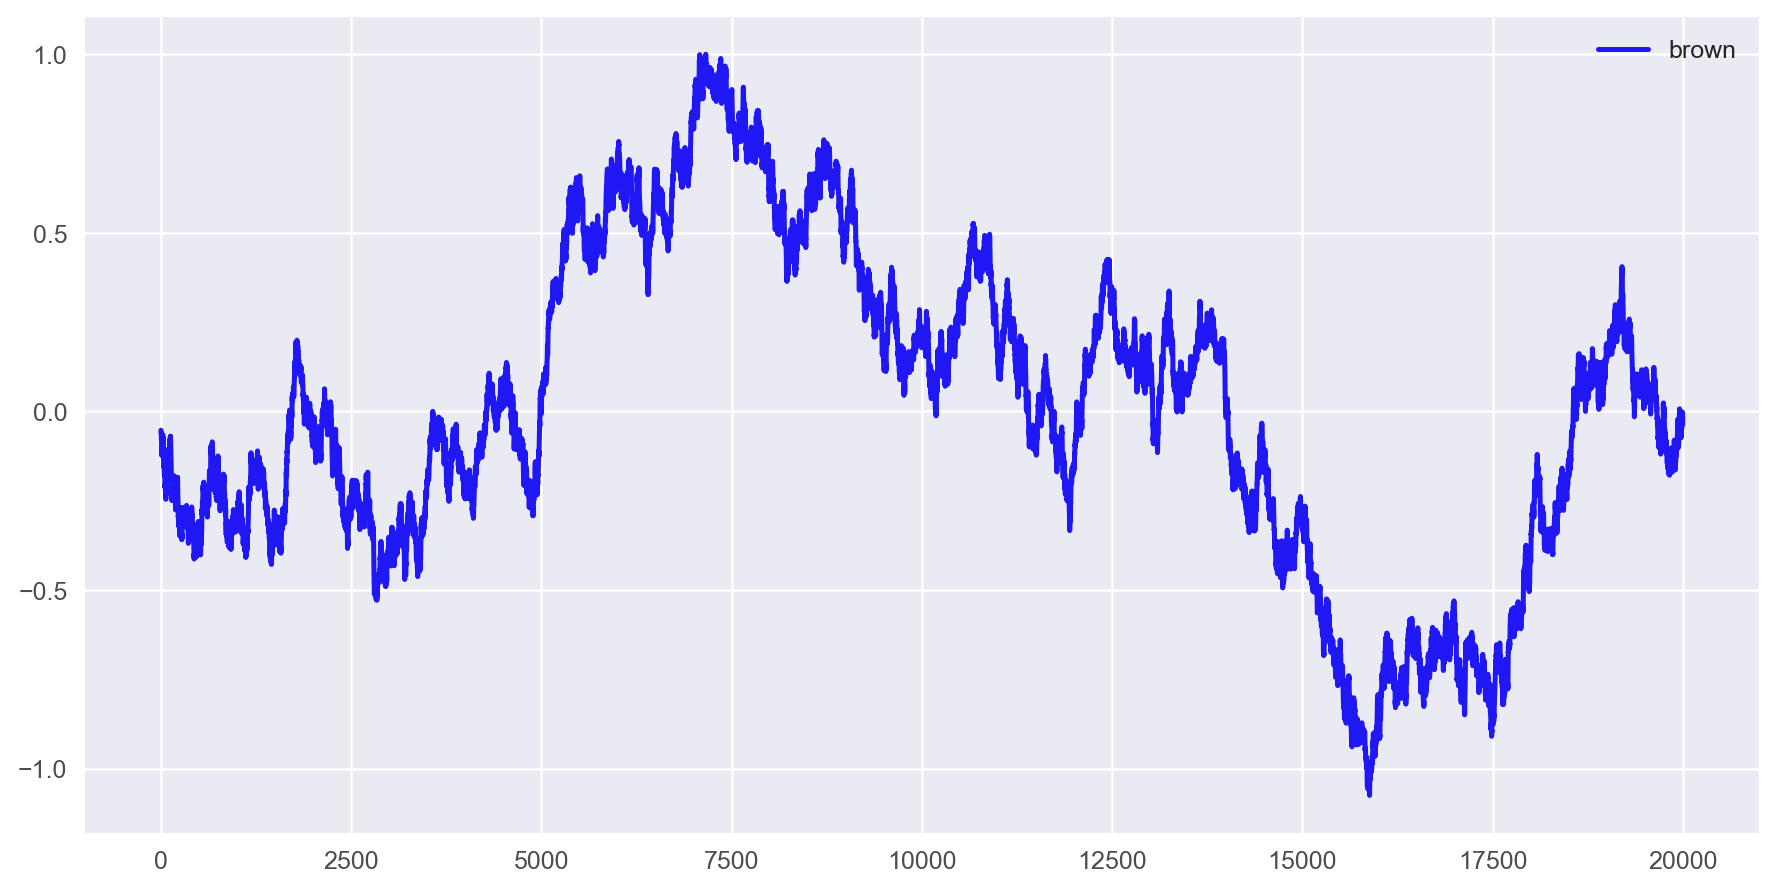

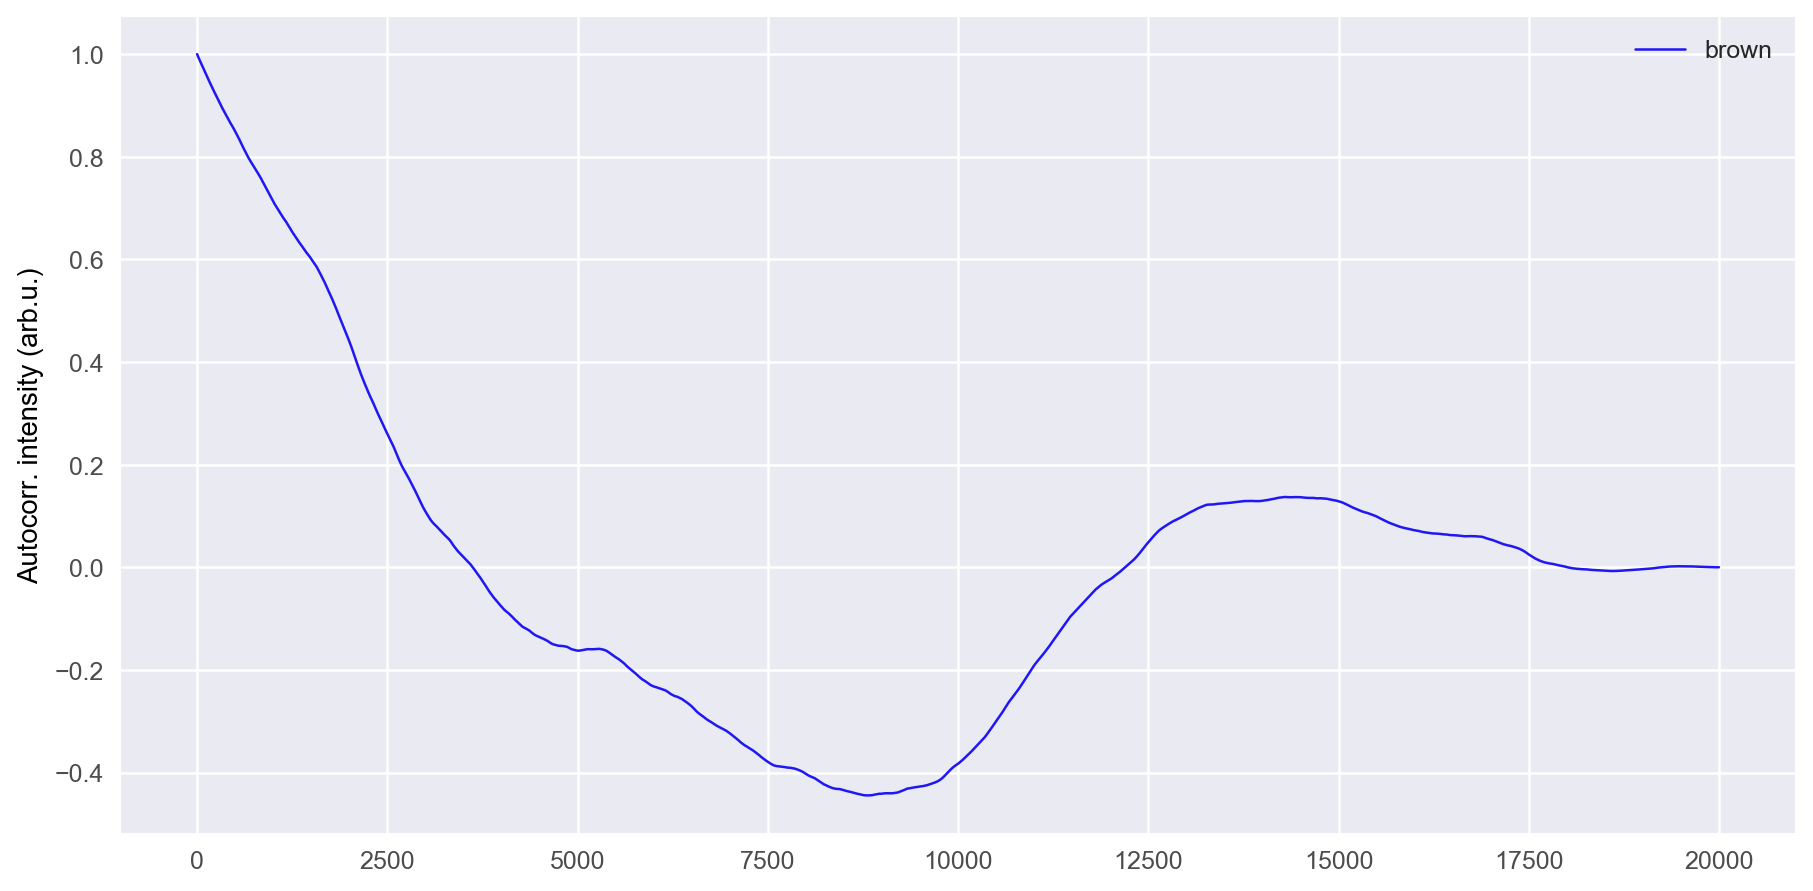

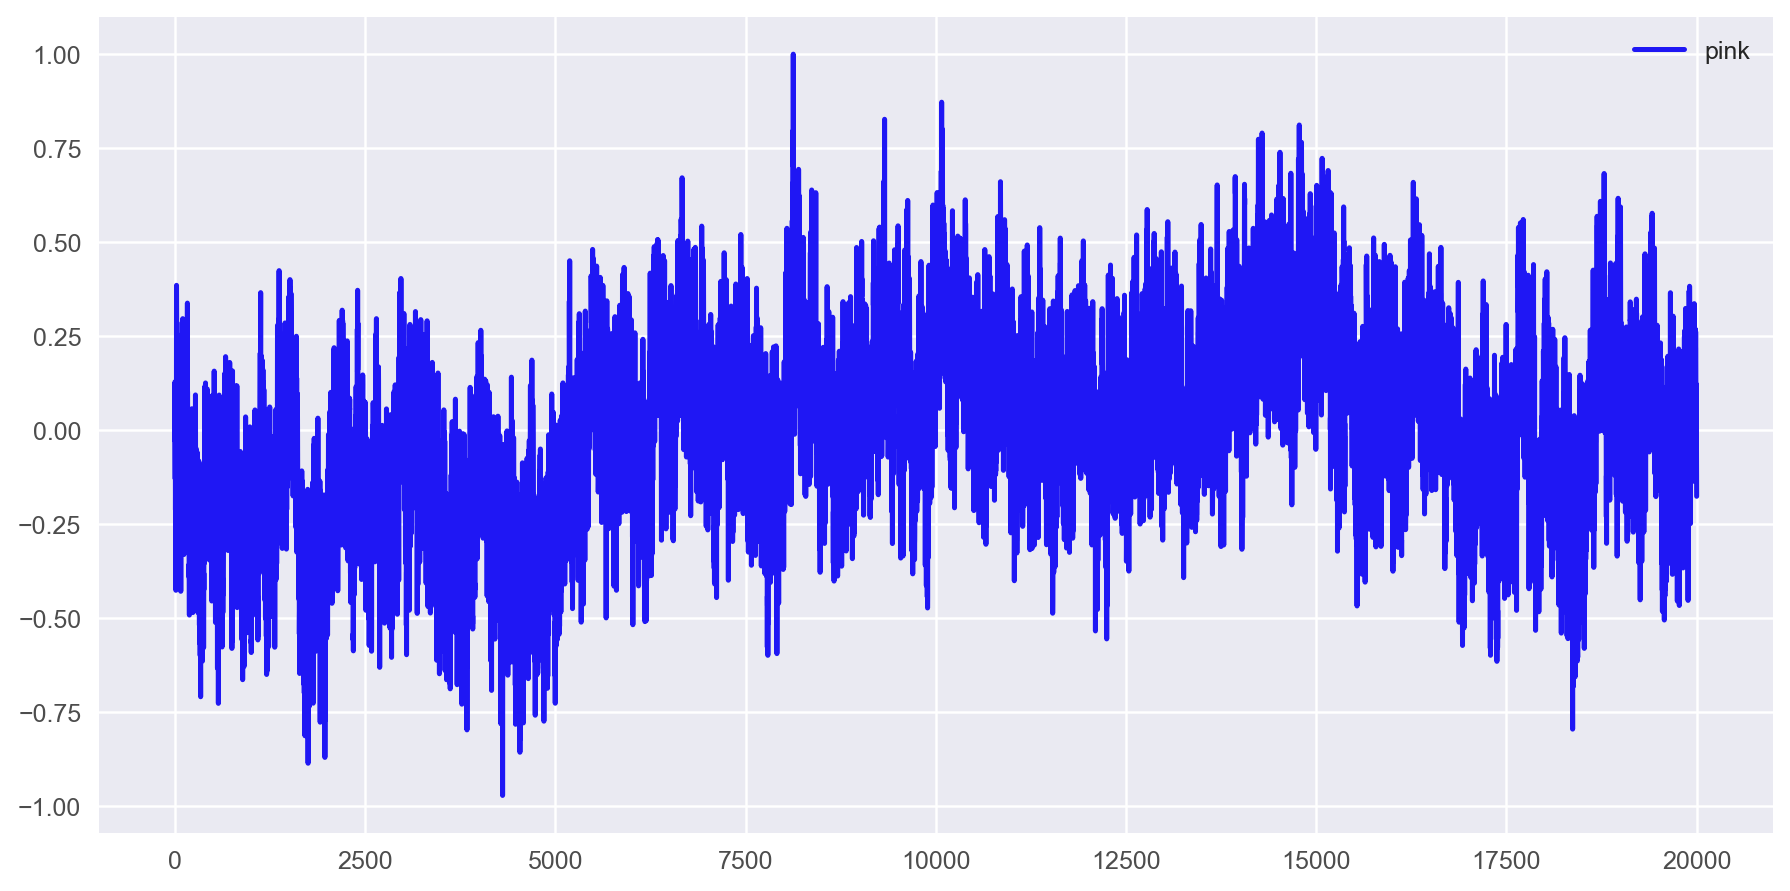

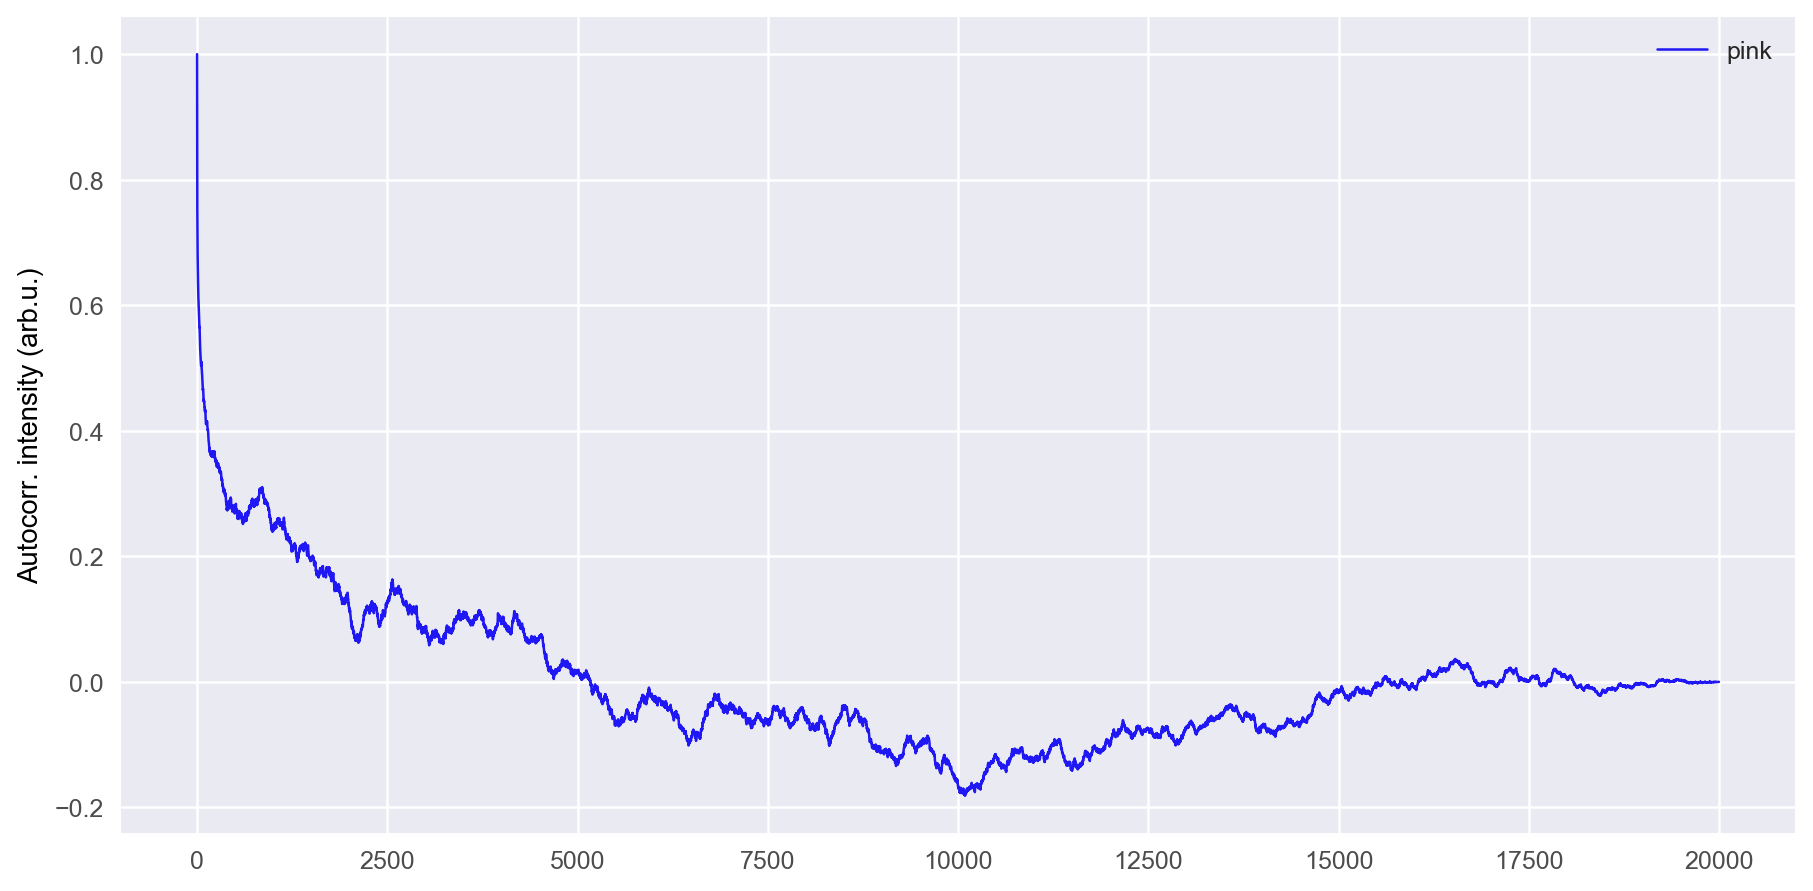

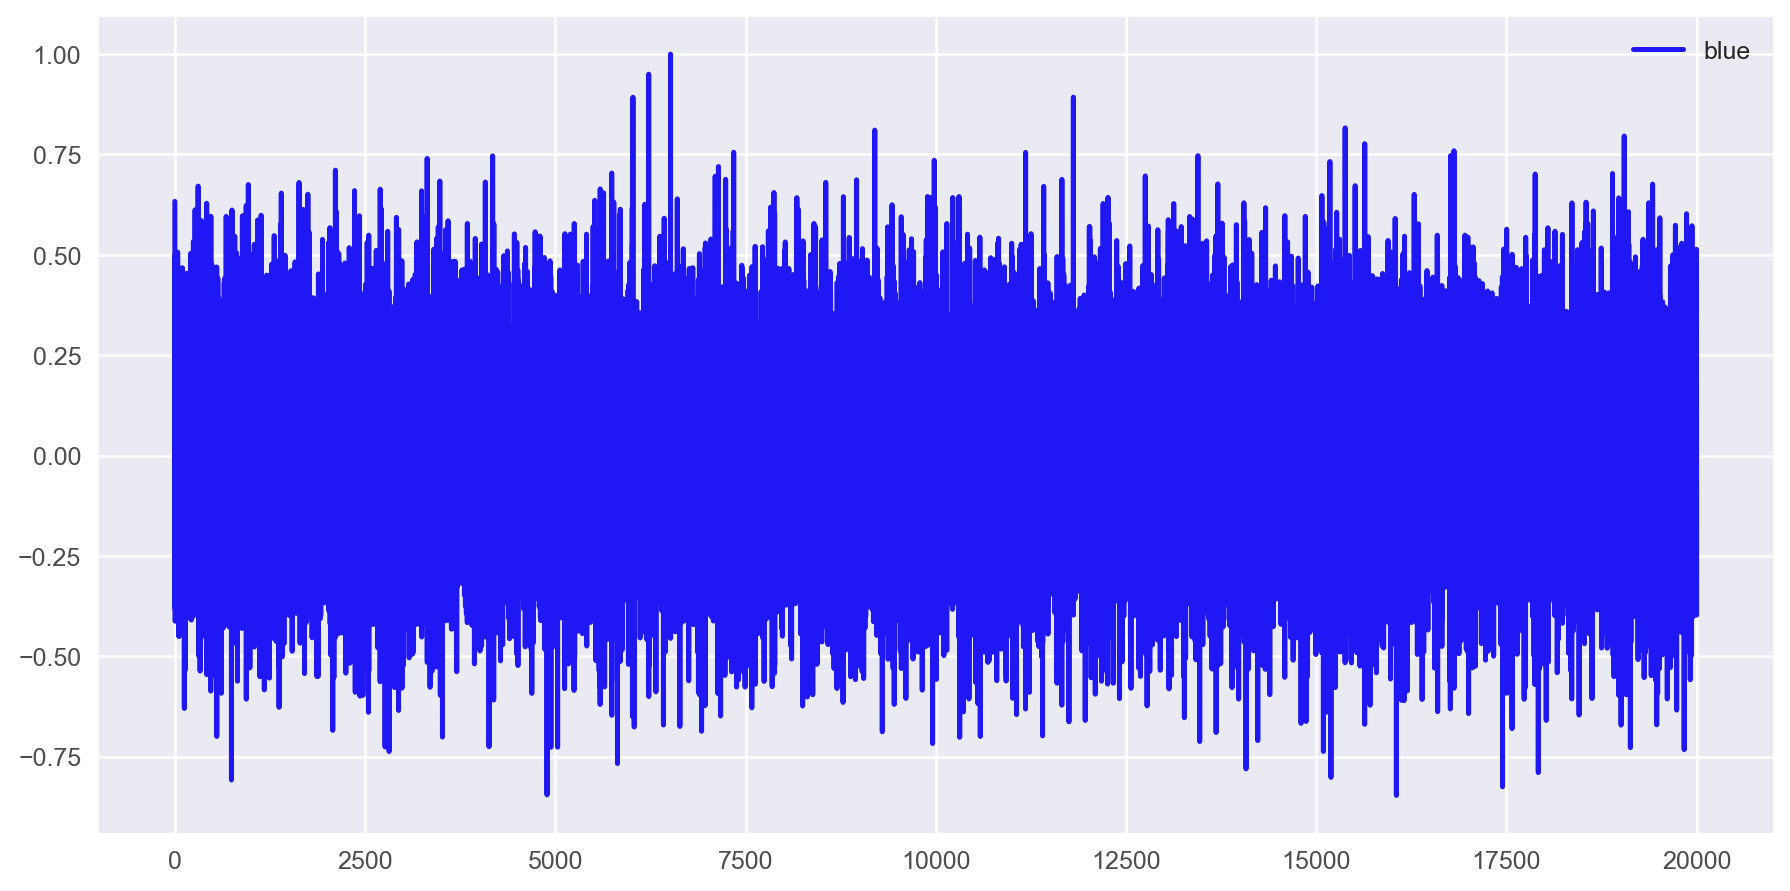

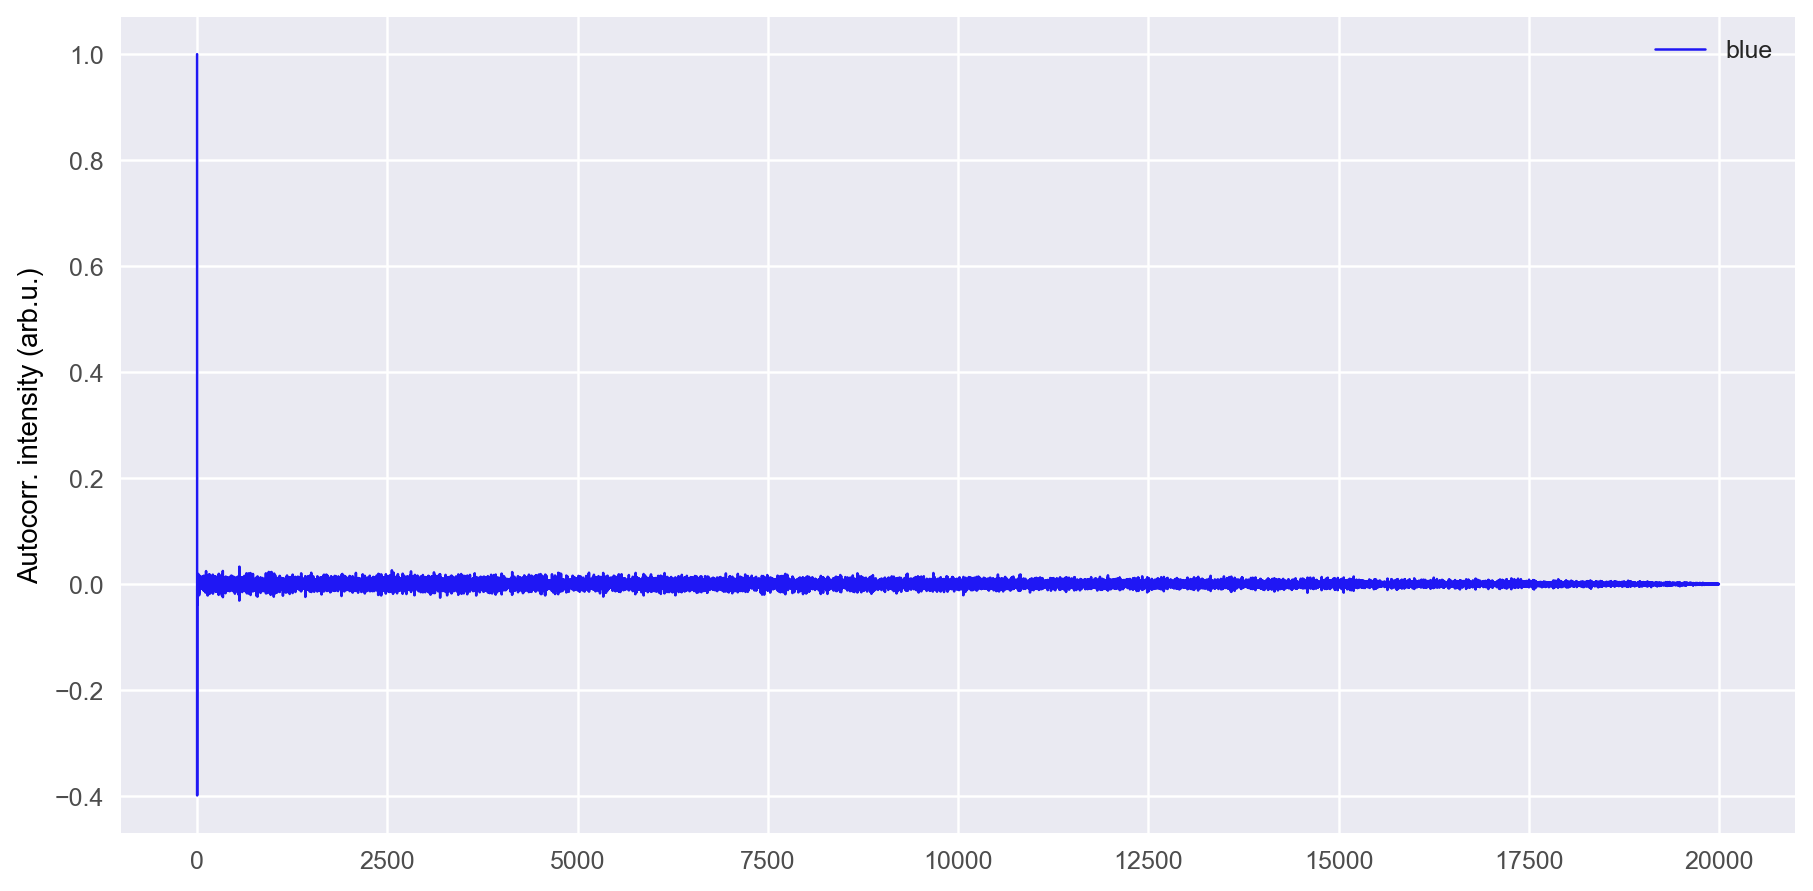

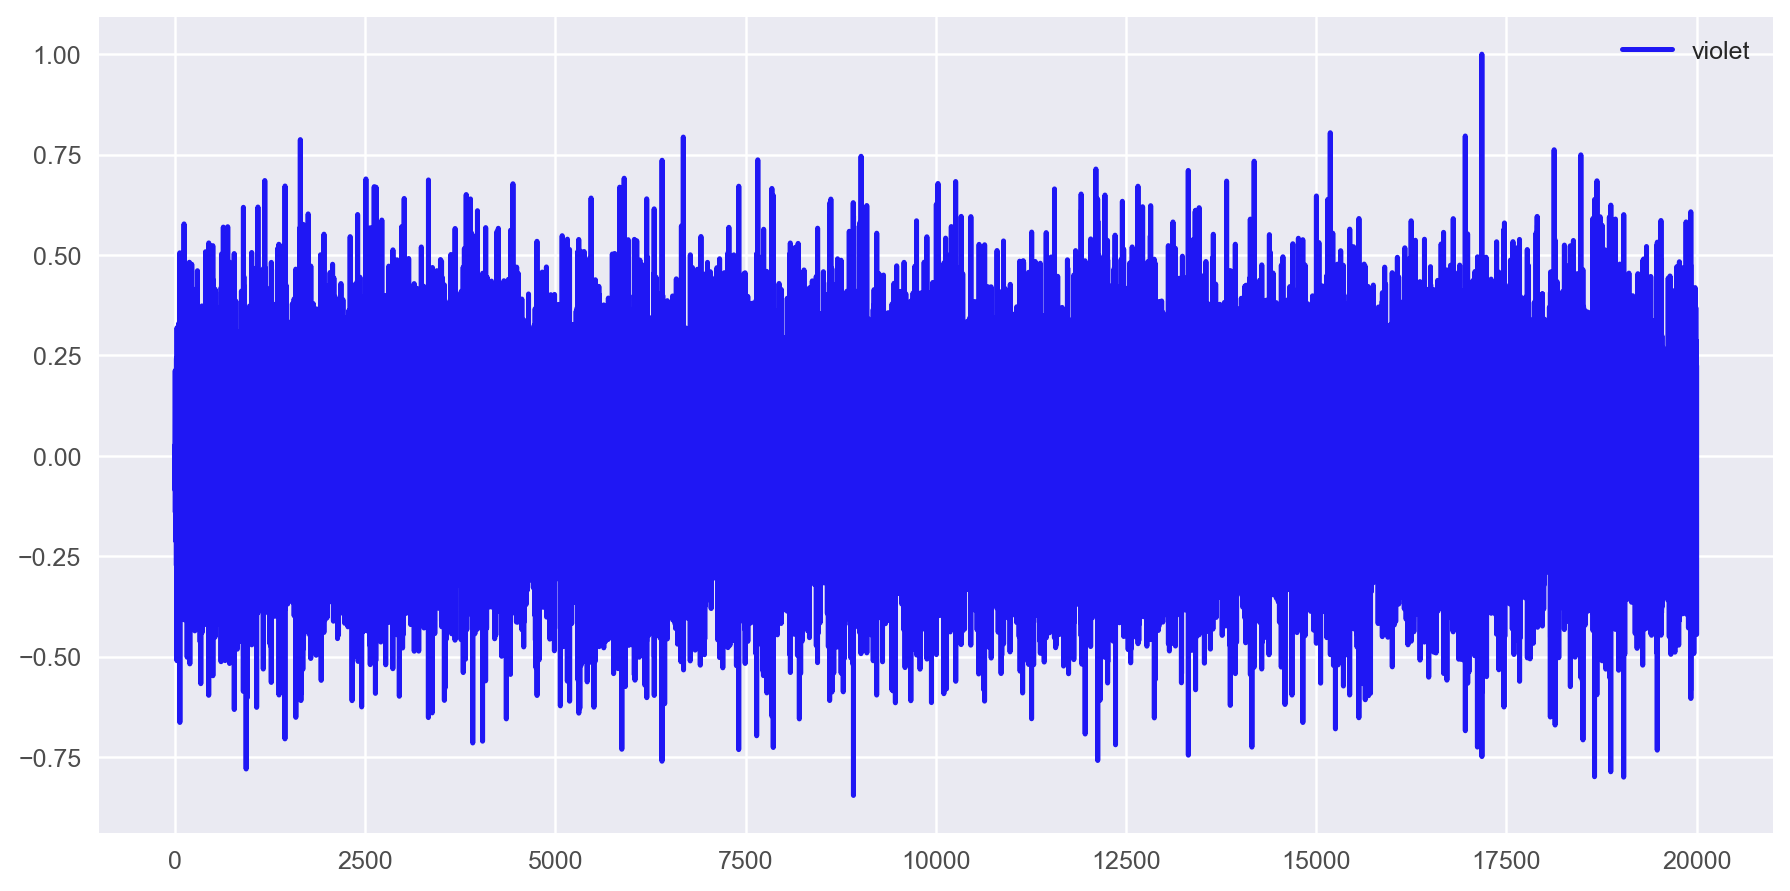

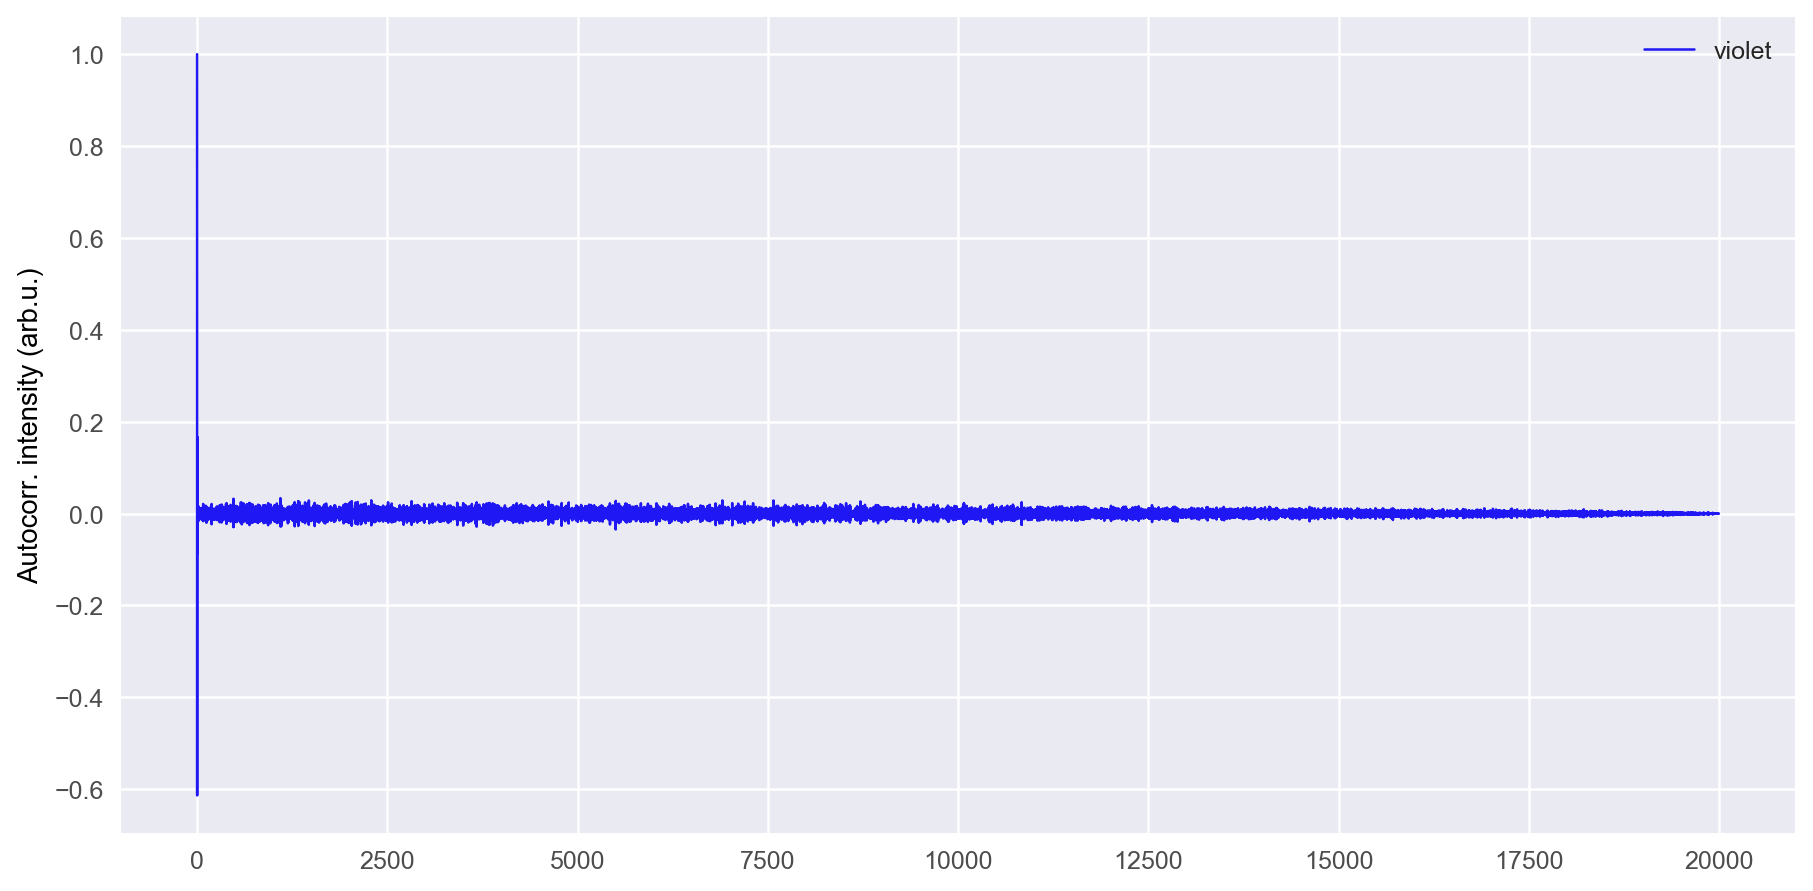

In [22]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

def plot_time_noise(N, noise_type):
    if noise_type == 'white':
        y = white_noise(N)
    elif noise_type == 'brown':
        y = brownian_noise(N)
    elif noise_type == 'pink':
        y = pink_noise(N)
    elif noise_type == 'blue':
        y = blue_noise(N)
    elif noise_type == 'violet':
        y = violet_noise(N)
    plt.plot(y/y.max(), '-',label = noise_type)
    plt.legend()
    plt.show()

    y = y/y.max()

    ycorr = autocorr(y-y.mean())
    x_axis = np.linspace(0, total_time, int(total_time/binwidth))*1e-6
    plt.plot(ycorr[:], '-', linewidth=1, label=noise_type)
    plt.ylabel('Autocorr. intensity (arb.u.)')
    plt.legend()
    plt.show()
    
N = int(2e4+1)
noise = ["white","brown","pink","blue","violet"]
for noise_type in noise:
    plot_time_noise(N, noise_type)
